In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file= r"C:\Users\José Martins\Desktop\LABS and PROJECTS\WEEK 5\LAB 1\amz_uk_price_prediction_dataset.csv"


df = pd.read_csv(file)


display(df)


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


## Part 1: Analyzing Best-Seller Trends Across Product Categories

In [ ]:
crosstab = pd.crosstab(df['category'], df['isBestSeller'])
crosstab.columns = ['Not Best-Seller', 'Best-Seller']


display(crosstab)

In [ ]:
crosstab_pbs = crosstab.copy()
crosstab_pbs['Proportion Best-Seller'] = crosstab['Best-Seller']  / (crosstab['Best-Seller'] + crosstab['Not Best-Seller'])
display(crosstab_pbs)

sorted_crosstab = crosstab_pbs.sort_values(by='Proportion Best-Seller', ascending=False)
display(sorted_crosstab)

In [ ]:
from scipy.stats import chi2_contingency


chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab)

chi2_statistic, chi2_p_value

In [ ]:
from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab, method="cramer")

A p-value of 0.0 in chi-square test indicates an extremely strong evidence against the null hypothesis, suggesting 
that there is a statistically significant association between the product categories and their 
best-seller status. However, the weak Cramér's V value (0.122) indicates that while the association is 
statistically significant, it is not very strong in practical terms.

In [ ]:

top_categories = sorted_crosstab.index[:10]

df_filtered = sorted_crosstab.loc[top_categories]
df_filtered1 = df_filtered.drop('Proportion Best-Seller', axis=1)


df_filtered1.plot(kind='bar', stacked=True, color=['salmon', 'lightblue'], figsize=(10, 6))

## Part 2: Exploring Product Prices and Ratings Across Categories and Brands


In [11]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

no_out_df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

display(no_out_df)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


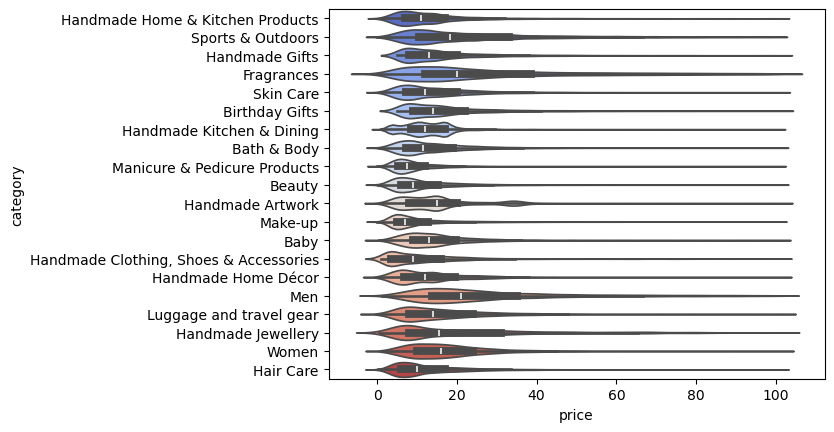

In [13]:
# Calculate the top 10 categories based on count
top_20_categories = no_out_df['category'].value_counts().nlargest(20).index


sns.violinplot(data=no_out_df[no_out_df['category'].isin(top_20_categories)], x='price', y='category', palette="coolwarm", hue='category', legend=False)


plt.show()

Seems to be Men, in  the top 20 with highest median price

<Axes: ylabel='category'>

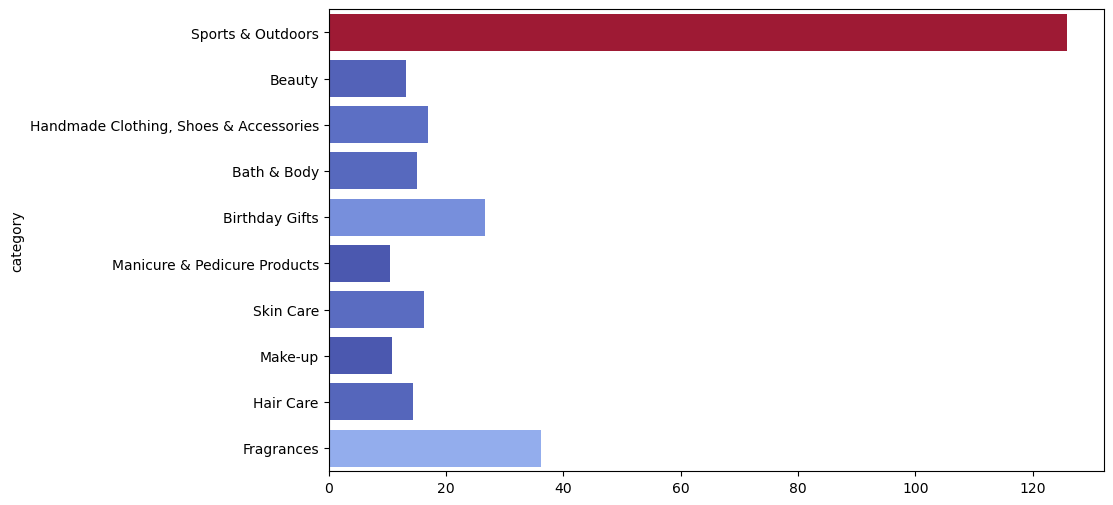

In [21]:
avg_price = df.groupby('category')['price'].mean()

# Select the top 10 product categories based on count
top_10_categories = df['category'].value_counts().nlargest(10).index

# Filter the average prices for the top 10 categories
top_10_average_prices = avg_price[top_10_categories]

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_average_prices.values, y=top_10_average_prices.index, palette="coolwarm",hue=top_10_average_prices.values,legend=False)

In [27]:
# Calculate the median rating for each category
median_rating_by_category = df.groupby('category')['stars'].median()


# Filter the ratings for the top 10 categories
ratings_top_10_categories = df[df['category'].isin(top_10_categories)]

<Axes: xlabel='stars', ylabel='category'>

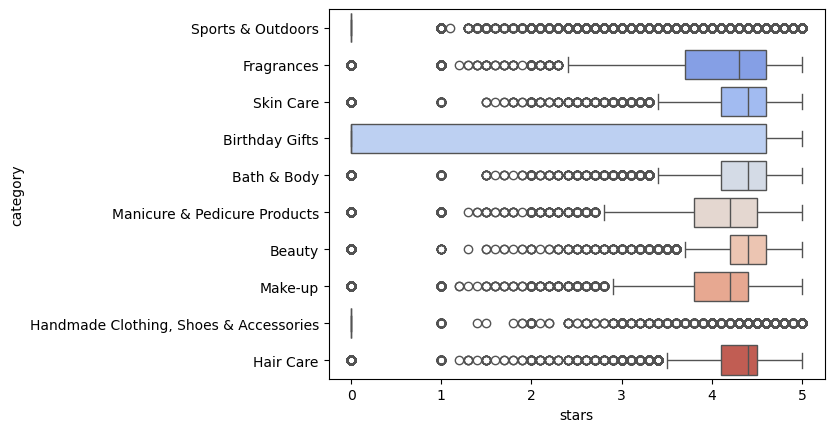

In [29]:
sns.boxplot(data=ratings_top_10_categories, x='stars', y='category', palette="coolwarm", hue='category', dodge=False)

In [48]:

df['stars'] = pd.to_numeric(df['stars'])


avg_rating_by_category = df.groupby('category')['stars'].mean().sort_values(ascending=False)


print(avg_rating_by_category)

category
Luxury Food & Drink                       4.547570
Grocery                                   4.469061
Laptop Accessories                        4.449600
Health & Personal Care                    4.439649
Arts & Crafts                             4.432663
                                            ...   
Motorbike Instruments                     0.166507
3D Printing & Scanning                    0.148267
Motorbike Handlebars, Controls & Grips    0.125466
Motorbike Electrical & Batteries          0.097857
CD, Disc & Tape Players                   0.083655
Name: stars, Length: 296, dtype: float64


## Part 3: Investigating the Interplay Between Product Prices and Ratings

In [50]:
correlation_coefficient = df['price'].corr(df['stars'])


print("Correlation Coefficient between Price and Stars:", correlation_coefficient)

Correlation Coefficient between Price and Stars: -0.12490673262159059


The Pearson correlation coefficient between 'price' and 'stars' is approximately -0.1249. Since this value is close to zero and negative, it suggests a weak negative linear relationship between product price and rating (stars).

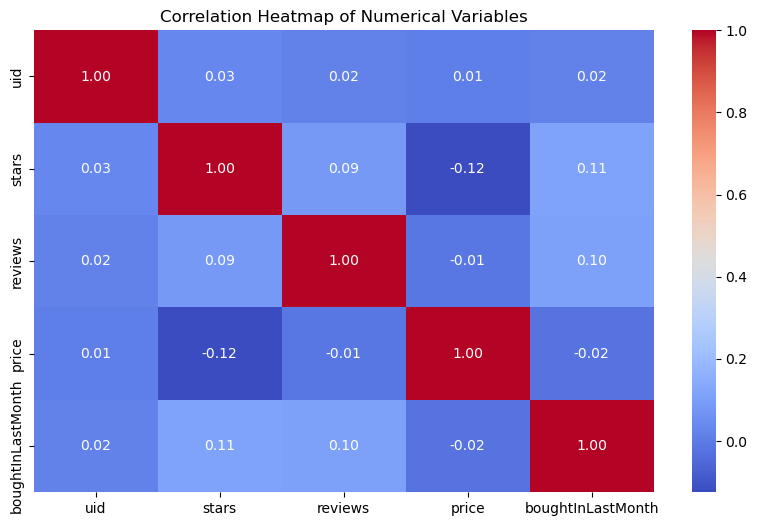

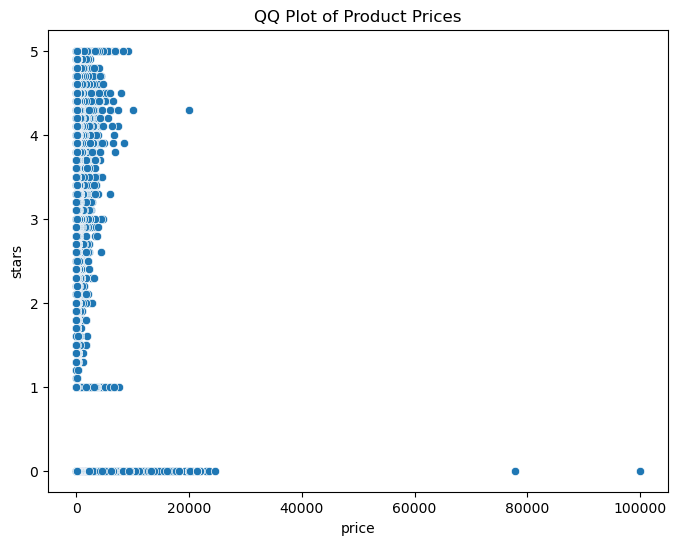

In [56]:
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Create a correlation heatmap to visualize correlations between numerical variables
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


# Examine if product prices typically follow a normal distribution using a QQ plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='price', y='stars')
plt.title('QQ Plot of Product Prices')
plt.show()